In [79]:
# data set - https://drive.google.com/drive/folders/10SUoVOHnv95fLr-w2HSktjQUd96jXA3U

In [80]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn librareis
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, roc_curve, roc_auc_score

# Ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [81]:
# data import
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Sets/diabetes.csv')
data.shape

(768, 9)

In [82]:
# data sample
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [83]:
# null value check
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [84]:
data.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [85]:
# analyse the target variable
round(data['Outcome'].value_counts(normalize=True)*100, 2)

,proportion
Outcome,
0,65.1
1,34.9


In [86]:
# Preparing data for the ML model

# Split the data into dependent and independent
x= data.drop(['Outcome'],axis=1)
y= data['Outcome']

#Train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#Data Scaling
scale = StandardScaler()
x_train_scaled= scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

In [87]:
# Logestic Model
logreg = LogisticRegression(random_state=42)
logreg.fit(x_train_scaled,y_train)
print('Training_Accuracy: ', round(logreg.score(x_train_scaled,y_train)*100,2),'%')

Training_Accuracy:  77.04 %


Testing_Accuracy:  75.32 %
Classification Report:

:               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



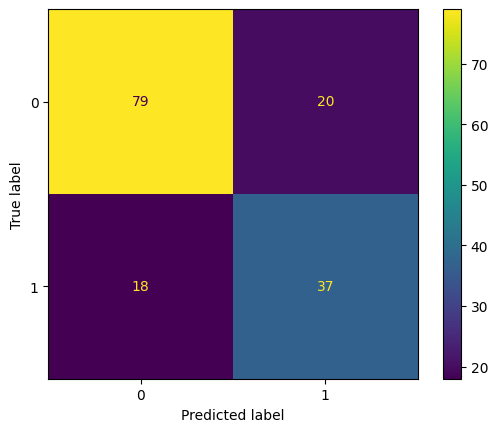

In [88]:
#Model Testing
y_pred= logreg.predict(x_test_scaled)

#metrix
print("Testing_Accuracy: ", round(accuracy_score(y_test,y_pred)*100,2),'%')
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print('Classification Report:\n\n:', classification_report(y_test,y_pred))

In [89]:
# resampling
smote=SMOTE()
x_train_smote,y_train_smote=smote.fit_resample(x_train_scaled,y_train)


In [90]:
# data distribution after resampling
round(y_train_smote.value_counts(normalize=True)*100,2)

,proportion
Outcome,
0,50.0
1,50.0


In [100]:
# Logestic Model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(x_train_smote,y_train_smote)
print('Training_Accuracy: ', round(logreg_model.score(x_train_smote,y_train_smote)*100,2),'%')

Training_Accuracy:  75.94 %


Testing_Accuracy:  70.78 %
Classification Report:

:               precision    recall  f1-score   support

           0       0.82      0.70      0.75        99
           1       0.57      0.73      0.64        55

    accuracy                           0.71       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.71      0.71       154



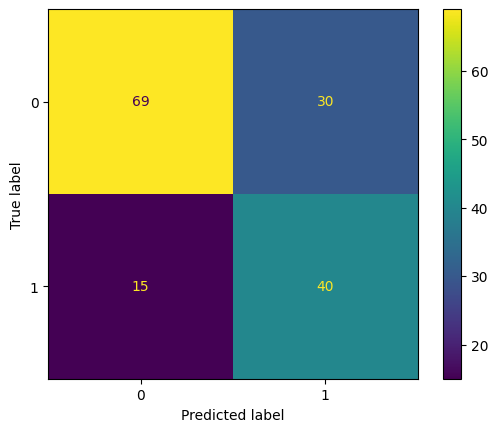

In [92]:
#Model Testing
y_pred= logreg_model.predict(x_test_scaled)

#metrix
print("Testing_Accuracy: ", round(accuracy_score(y_test,y_pred)*100,2),'%')
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print('Classification Report:\n\n:', classification_report(y_test,y_pred))

In [93]:
x= data.drop(['Outcome'],axis=1)
y= data['Outcome']

smote=SMOTE()
x1,y1=smote.fit_resample(x,y)
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1)

# Hyper Parameter Tunning

In [94]:
# parameter for grid
params = {#'criterion' : ['gini','entropy', 'log_loss','splitter'],
          'max_depth': [6,7,8,9,10,11,12],
          'min_samples_split': [2,4,6,8],
          'min_samples_leaf': [1,2,3,4]}

In [95]:
# Tuning the model with above combination to find the best parameter

# creating the classifier
dt= DecisionTreeClassifier(random_state=42)

#set up gridsearch
grid_search = GridSearchCV(estimator =dt,
                           param_grid=params,
                           n_jobs=-1,
                           verbose=4)

# fit the model with the data
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 112 candidates, totalling 560 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8]},
             verbose=4)

In [96]:
# Displaying the best parameter and best score
print('best parametrs for gridsearch:',grid_search.best_params_)
print('best score for gridsearch:',round(grid_search.best_score_*100,2),'%')

best parametrs for gridsearch: {'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 2}
best score for gridsearch: 74.43 %


In [97]:
# Building the final model with the best parameter from grid search
best_parameters = grid_search.best_params_
final_model=DecisionTreeClassifier(**best_parameters,random_state=42)

#fit the model on the final_model
final_model.fit(x_train,y_train)

# model score
print('Training_Score:', round(final_model.score(x_train,y_train)*100,2),'%')

Training_Score: 91.04 %


In [98]:
# Testing our model

y_pred_final = final_model.predict(x_test)
print('Testing_Score:', round(accuracy_score(y_test,y_pred_final)*100,2),'%')

Testing_Score: 72.08 %


Classification Report
:               precision    recall  f1-score   support

           0       0.77      0.81      0.79        99
           1       0.62      0.56      0.59        55

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



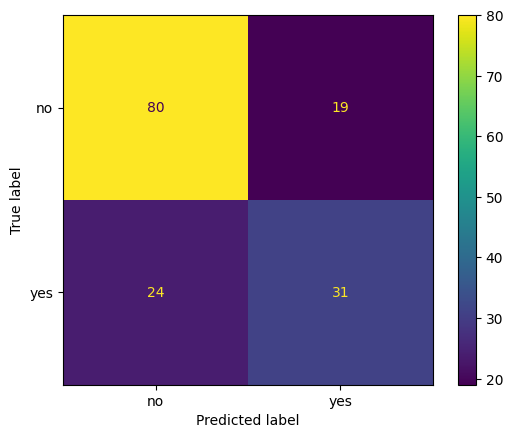

In [99]:
cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred_final,display_labels=['no','yes'])
print('Classification Report\n:', classification_report(y_test,y_pred_final))